# Analysis of pre-pilot

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from pre_post_analysis import load_data, summarize, likert_hist

In [4]:
pre_pre, pre_post, pre_marks = load_data('pre-pilot')

It looks like 3380 mis-remembered their id number for the post questionnaire:

In [5]:
set(pre_post.index), set(pre_pre.index)

({2439, 3308, 4555, 6340, 7704, 8897}, {2439, 3380, 4555, 6340, 7704, 8897})

In [6]:
ppi = list(pre_post.index)
ppi[ppi.index(3308)] = 3380
pre_post.index = ppi

Check if everyone gave the same answer to the duplicated question:

In [7]:
fname = 'How much computer code have you written?'
pd.concat([pre_pre[fname], pre_post[fname]], axis=1)

,How much computer code have you written?,How much computer code have you written?
2439,I've played with code but never wrote anything...,I've played with code but never wrote anything...
3380,I've never written any code,I've never written any code
4555,I've never written any code,I've never written any code
6340,I have written a small amount of useful code,I've never written any code
7704,I've never written any code,I've never written any code
8897,I've never written any code,I've never written any code


6340 changed his mind about having written code ...  We'll stick with the first value for consistency with the other study.

In [8]:
pre_post.drop(columns=[fname], inplace=True)

In [9]:
pre = pre_marks.join(pre_pre).join(pre_post, rsuffix='_post')

In [10]:
pre.columns

Index(['rainfall', 'sprinting', 'study_id', 'widgets', 'exam_total',
       'Timestamp', 'Did you take A-level maths?  What grade did you get?',
       'Did you take A-level physics?  What grade did you get?',
       'Did you take A-level chemistry?  What grade did you get?',
       'Did you take A-level biology?  What grade did you get?',
       'Did you take A-level computer science?  What grade did you get?',
       'What grade did you get in GCSE maths?',
       'Did you take GCSE computer science?  What grade did you get?',
       'How much computer code have you written?', 'Are you',
       'In which school is your course based?',
       'In which year are you (year just finished)', 'Timestamp_post',
       'The main reason I wanted to do this course was',
       'I had a better understanding of statistics after the course.',
       'Writing the statistical procedures in code made them harder to understand.',
       'After the course, I feel more confident about doing my own data

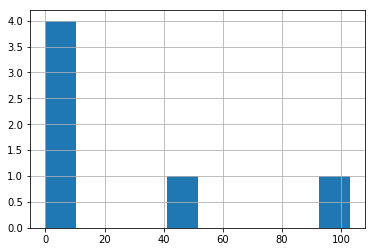

In [11]:
pre['exam_total'].hist()

In [12]:
pre['exam_total'].describe()

count      6.000000
mean      27.166667
std       41.978169
min        0.000000
25%        2.250000
50%        3.500000
75%       39.250000
max      103.000000
Name: exam_total, dtype: float64

In [13]:
pre['exam_total']

id
2439    103
3380      2
4555      3
6340      4
7704     51
8897      0
Name: exam_total, dtype: int64

In [14]:
def exam_sum(field_name):
    return summarize(pre, field_name, 'exam_total')

In [15]:
exam_sum('What grade did you get in GCSE maths?')

exam_total               
                                           count min  max  mean
What grade did you get in GCSE maths?                          
Grade A                                        5   0  103  32.2
I didn't take it                               1   2    2   2.0

In [16]:
exam_sum('Did you take GCSE computer science?  What grade did you get?')

exam_total               
                                                        count min  max  mean
Did you take GCSE computer science?  What grade...                          
Grade A                                                     1   4    4   4.0
I didn't take it                                            5   0  103  31.8

In [17]:
exam_sum('The main reason I wanted to do this course was')

exam_total               
                                                        count min  max  mean
The main reason I wanted to do this course was                              
The 120 pound bursary                                       2   3    4   3.5
The bursary and the learning were equally impor...          4   0  103  39.0

In [18]:
exam_sum('How much computer code have you written?')

exam_total               
                                                        count  min  max mean
How much computer code have you written?                                    
I have written a small amount of useful code                1    4    4    4
I've never written any code                                 4    0   51   14
I've played with code but never wrote anything ...          1  103  103  103

In [19]:
exam_sum('In which year are you (year just finished)')

exam_total               
                                                count min  max  mean
In which year are you (year just finished)                          
Year 1                                              4   0  103  39.0
Year 2                                              2   3    4   3.5

In [20]:
exam_sum('Did you take A-level maths?  What grade did you get?')

exam_total              
                                                        count min  max mean
Did you take A-level maths?  What grade did you...                         
Grade A                                                     1   4    4    4
Grade B                                                     1  51   51   51
I didn't take it                                            4   0  103   27

## Feedback

In [21]:
pre.columns

Index(['rainfall', 'sprinting', 'study_id', 'widgets', 'exam_total',
       'Timestamp', 'Did you take A-level maths?  What grade did you get?',
       'Did you take A-level physics?  What grade did you get?',
       'Did you take A-level chemistry?  What grade did you get?',
       'Did you take A-level biology?  What grade did you get?',
       'Did you take A-level computer science?  What grade did you get?',
       'What grade did you get in GCSE maths?',
       'Did you take GCSE computer science?  What grade did you get?',
       'How much computer code have you written?', 'Are you',
       'In which school is your course based?',
       'In which year are you (year just finished)', 'Timestamp_post',
       'The main reason I wanted to do this course was',
       'I had a better understanding of statistics after the course.',
       'Writing the statistical procedures in code made them harder to understand.',
       'After the course, I feel more confident about doing my own data

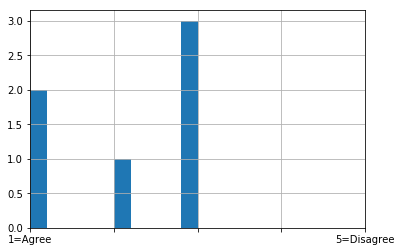

In [22]:
# 1 = Agree
likert_hist(pre['I had a better understanding of statistics after the course.'], 
            ['Agree', '', '', '', 'Disagree'])

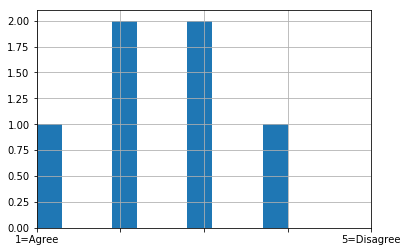

In [23]:
# 1 = Agree
likert_hist(pre['Writing the statistical procedures in code made them harder to understand.'],
            ['Agree', '', '', '', 'Disagree'])

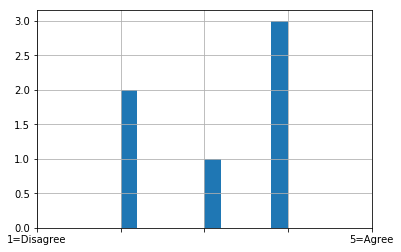

In [24]:
# 1 - Disagree
likert_hist(pre['After the course, I feel more confident about doing my own data analysis'],
            ['Disagree', '', '', '', 'Agree'])

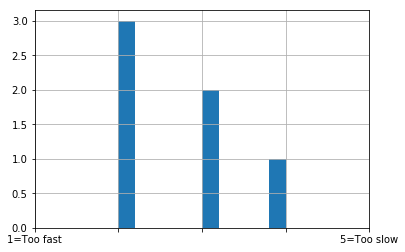

In [25]:
# 1 = Too fast, 5 = Too slow
likert_hist(pre['About the pace of the course, was it:'],
            ['Too fast', '', '', '', 'Too slow'])

In [26]:
pre_post.mean()

I had a better understanding of statistics after the course.                  2.166667
Writing the statistical procedures in code made them harder to understand.    2.500000
After the course, I feel more confident about doing my own data analysis      3.166667
About the pace of the course, was it:                                         2.666667
dtype: float64